In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd


In [2]:
df_agg_seeding_climate = pd.read_parquet('/Users/dulminiguruge/Documents/GitHub/crop_stages_detection_2026/data/processed/aggregated_seeding_dates_&_climate.parquet')
df_agg_seeding_climate


,Township,Year,Soil_temp_l1_min,Soil_temp_l1_max,Soil_temp_l1_mean,Soil_temp_l2_min,Soil_temp_l2_max,Soil_temp_l2_mean,Date,Cumulative_GDD,Seeding_DOY,SoilType,Longitude,Latitude
0,1-1-W2,2024,3.960586,13.089944,7.802019,5.040384,7.259482,5.997661,2024-05-17,176.216675,138,Dark Brown,-102.073734,49.043142
1,1-1-W2,2025,3.177918,12.671351,6.998692,4.476064,6.773033,5.454980,2025-05-09,71.119003,129,Dark Brown,-102.073734,49.043142
2,1-10-W1,2024,3.530800,11.945325,6.874218,4.178240,6.314601,5.065541,2024-05-17,146.441560,138,Moist Black,-98.739636,49.044182
3,1-10-W1,2025,5.023189,13.699092,8.593812,6.465001,8.845215,7.457578,2025-05-26,152.201324,146,Moist Black,-98.739636,49.044182
4,1-10-W2,2024,3.986141,13.811825,8.089683,5.083171,7.359984,6.084133,2024-05-16,193.563369,137,Dark Brown,-103.275477,49.043042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,9-22-W2,2024,3.842672,13.672552,7.886018,5.014152,7.306414,6.030634,2024-05-17,177.021667,138,Brown,-104.919660,49.741045
1223,9-25-W4,2025,2.638684,12.941293,6.848000,4.472846,6.600827,5.439670,2025-05-03,88.282425,123,Moist Dark Brown,-113.321119,49.742269
1224,9-26-W4,2025,2.157290,12.768448,6.452752,4.129984,6.371424,5.161006,2025-05-03,82.249816,123,Moist Dark Brown,-113.456792,49.742269
1225,9-32-W1,2024,5.413265,13.593945,8.892028,6.612388,8.668982,7.515864,2024-06-13,335.131348,165,Black,-101.758974,49.753862


In [3]:
df_agg_seeding_climate.columns


Index(['Township', 'Year', 'Soil_temp_l1_min', 'Soil_temp_l1_max',
       'Soil_temp_l1_mean', 'Soil_temp_l2_min', 'Soil_temp_l2_max',
       'Soil_temp_l2_mean', 'Date', 'Cumulative_GDD', 'Seeding_DOY',
       'SoilType', 'Longitude', 'Latitude'],
      dtype='object')

In [4]:
# Filter the necessary columns
df_agg_seeding_climate =df_agg_seeding_climate[['Township', 'Longitude', 'Latitude',  'Year', 'Soil_temp_l1_min', 'Soil_temp_l1_max',
       'Soil_temp_l1_mean', 'Soil_temp_l2_min', 'Soil_temp_l2_max',
       'Soil_temp_l2_mean',  'Cumulative_GDD', 'Seeding_DOY',
       'SoilType']]

# Filter Methods

##  Correlation Coefficent

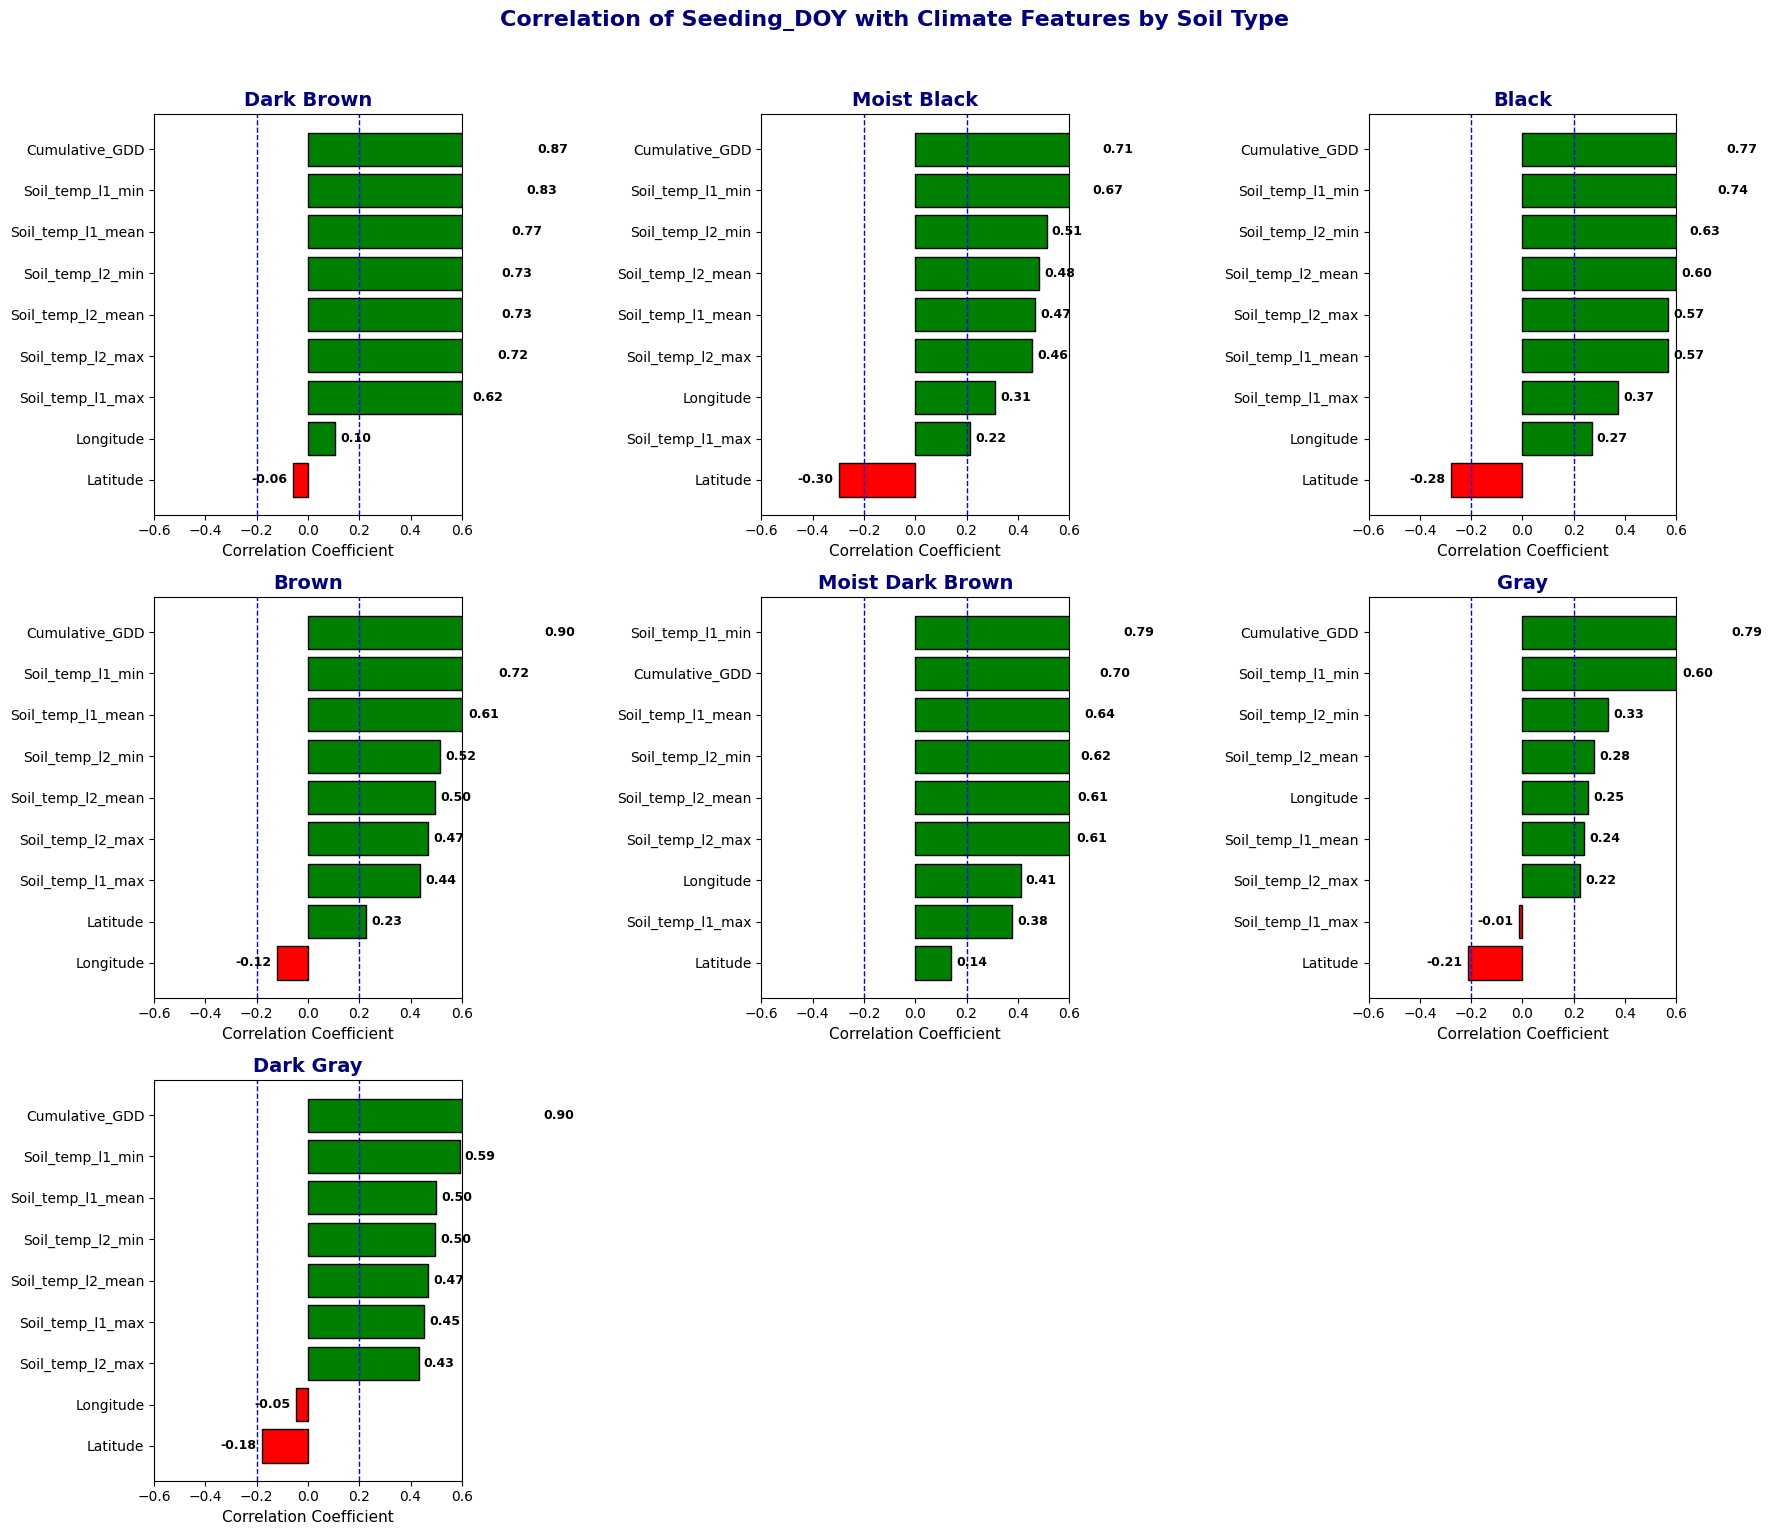

In [8]:


# Get unique soil types
soil_types = df_agg_seeding_climate['SoilType'].unique().tolist()

# Create subplot grid based on number of soil types
n_cols = min(len(soil_types), 3)
n_rows = (len(soil_types) + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6*n_cols, 5*n_rows))
axes = np.array(axes).flatten() if len(soil_types) > 1 else [axes]

# Columns to drop
columns_to_drop = ['Township', 'Date', 'SoilType', 'Year']

for i, soil in enumerate(soil_types):
    ax = axes[i]
    
    # Filter for current soil type
    df_soil = df_agg_seeding_climate[df_agg_seeding_climate['SoilType'] == soil]
    
    # Drop non-numeric columns
    df_corr = df_soil.drop(columns=[col for col in columns_to_drop if col in df_soil.columns])
    
    # Compute correlations with Seeding_DOY
    corr = df_corr.corr()['Seeding_DOY'].drop('Seeding_DOY').sort_values()
    
    # Plot horizontal bar chart
    y_pos = np.arange(len(corr))
    colors = ['green' if val >= 0 else 'red' for val in corr.values]
    ax.barh(y_pos, corr.values, color=colors, edgecolor='black')
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(corr.index, fontsize=10)
    ax.axvline(x=-0.20, color='blue', linestyle='--', linewidth=1)
    ax.axvline(x=0.20, color='blue', linestyle='--', linewidth=1)
    
    for j, val in enumerate(corr.values):
        ha, x_pos = ('right', val - 0.02) if val < 0 else ('left', val + 0.02)
        ax.text(x_pos, j, f'{val:.2f}', va='center', ha=ha, fontsize=9, fontweight='bold')
    
    ax.set_title(f'{soil}', fontsize=14, fontweight='bold', color='navy')
    ax.set_xlabel('Correlation Coefficient', fontsize=11)
    ax.set_xlim(-0.6, 0.6)

# Hide extra subplots
for j in range(len(soil_types), len(axes)):
    axes[j].axis('off')

fig.suptitle("Correlation of Seeding_DOY with Climate Features by Soil Type", 
             fontsize=16, fontweight='bold', color='navy', y=1.02)
plt.tight_layout()
plt.show()

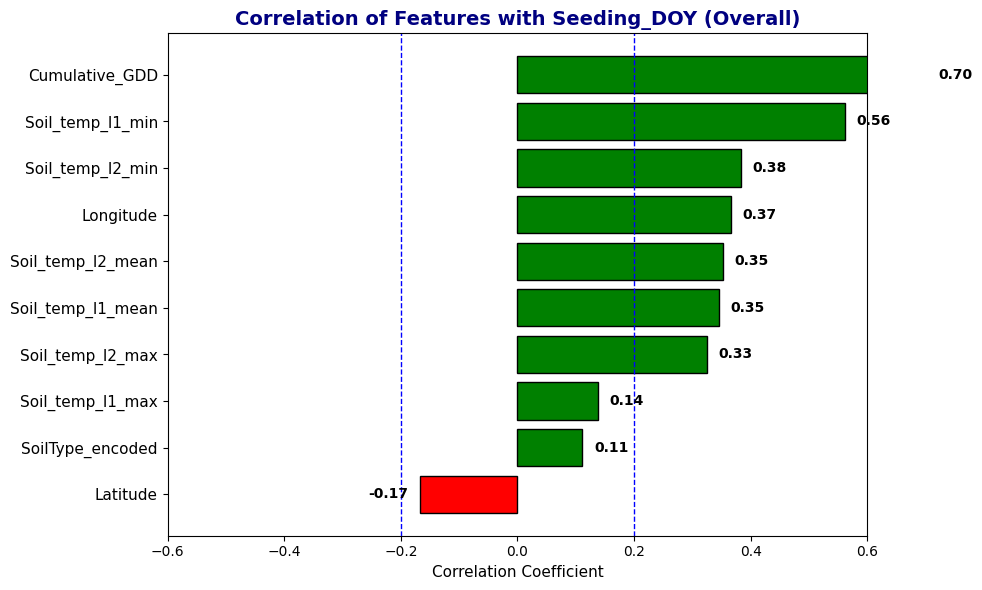


SoilType Encoding:
  1: Brown (n=76)
  2: Dark Brown (n=185)
  3: Moist Dark Brown (n=100)
  4: Black (n=349)
  5: Moist Black (n=358)
  6: Gray (n=118)
  7: Dark Gray (n=41)


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create a copy to avoid modifying original
df_analysis = df_agg_seeding_climate.copy()

# Define custom soil type encoding
soil_type_encoding = {
    'Brown': 1,
    'Dark Brown': 2,
    'Moist Dark Brown': 3,
    'Black': 4,
    'Moist Black': 5,
    'Gray': 6,
    'Dark Gray': 7
}

# Apply custom encoding
df_analysis['SoilType_encoded'] = df_analysis['SoilType'].map(soil_type_encoding)

# Check for unmapped soil types
unmapped = df_analysis[df_analysis['SoilType_encoded'].isna()]['SoilType'].unique()
if len(unmapped) > 0:
    print(f"⚠️ Unmapped soil types: {unmapped}")

# Columns to drop
columns_to_drop = ['Township', 'Date', 'SoilType', 'Year']
df_corr = df_analysis.drop(columns=[col for col in columns_to_drop if col in df_analysis.columns])

# Compute correlations with Seeding_DOY
corr = df_corr.corr()['Seeding_DOY'].drop('Seeding_DOY').sort_values()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

y_pos = np.arange(len(corr))
colors = ['green' if val >= 0 else 'red' for val in corr.values]
ax.barh(y_pos, corr.values, color=colors, edgecolor='black')

ax.set_yticks(y_pos)
ax.set_yticklabels(corr.index, fontsize=11)
ax.axvline(x=-0.20, color='blue', linestyle='--', linewidth=1)
ax.axvline(x=0.20, color='blue', linestyle='--', linewidth=1)

for j, val in enumerate(corr.values):
    ha, x_pos = ('right', val - 0.02) if val < 0 else ('left', val + 0.02)
    ax.text(x_pos, j, f'{val:.2f}', va='center', ha=ha, fontsize=10, fontweight='bold')

ax.set_title("Correlation of Features with Seeding_DOY (Overall)", fontsize=14, fontweight='bold', color='navy')
ax.set_xlabel('Correlation Coefficient', fontsize=11)
ax.set_xlim(-0.6, 0.6)

plt.tight_layout()
plt.show()

# Print the soil type encoding mapping
print("\nSoilType Encoding:")
for soil, code in soil_type_encoding.items():
    count = (df_analysis['SoilType'] == soil).sum()
    print(f"  {code}: {soil} (n={count})")

## Variance Threshhold

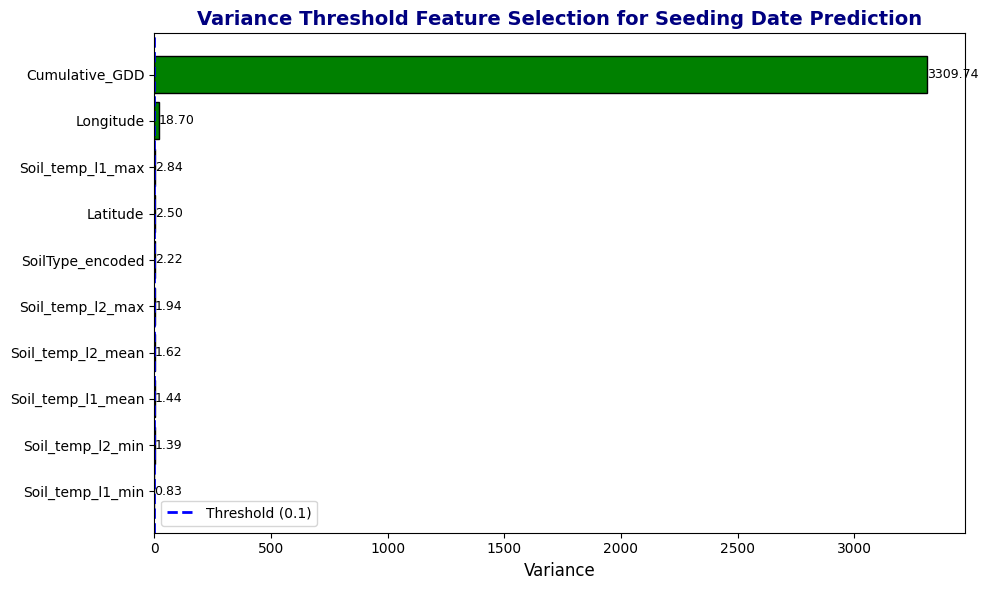


Selected Features (10):
['Longitude', 'Latitude', 'Soil_temp_l1_min', 'Soil_temp_l1_max', 'Soil_temp_l1_mean', 'Soil_temp_l2_min', 'Soil_temp_l2_max', 'Soil_temp_l2_mean', 'Cumulative_GDD', 'SoilType_encoded']

Removed Features (0):
[]


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold


# Apply encoding if not already present
if 'SoilType_encoded' not in df_analysis.columns:
    df_analysis['SoilType_encoded'] = df_analysis['SoilType'].map(soil_type_encoding)

# Columns to drop (non-features)
columns_to_drop = ['Township', 'Year', 'Date', 'SoilType', 'Seeding_DOY']

# Keep only feature columns (includes SoilType_encoded)
X = df_analysis.drop(columns=[col for col in columns_to_drop if col in df_analysis.columns])

# Apply VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
selector.fit(X)

# Get all features with their variances
all_features = X.columns
all_variances = selector.variances_

# Get selected features (above threshold)
selected_mask = selector.get_support()
selected_features = all_features[selected_mask]
removed_features = all_features[~selected_mask]

# Create dataframe for plotting
variance_df = pd.DataFrame({
    'Feature': all_features,
    'Variance': all_variances,
    'Selected': selected_mask
}).sort_values('Variance', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['green' if sel else 'red' for sel in variance_df['Selected']]
ax.barh(variance_df['Feature'], variance_df['Variance'], color=colors, edgecolor='black')

ax.axvline(x=0.1, color='blue', linestyle='--', linewidth=2, label='Threshold (0.1)')
ax.set_xlabel('Variance', fontsize=12)
ax.set_title('Variance Threshold Feature Selection for Seeding Date Prediction', 
             fontsize=14, fontweight='bold', color='navy')
ax.legend()

for i, (var, feat) in enumerate(zip(variance_df['Variance'], variance_df['Feature'])):
    ax.text(var + 0.5, i, f'{var:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary
print(f"\nSelected Features ({len(selected_features)}):")
print(list(selected_features))
print(f"\nRemoved Features ({len(removed_features)}):")
print(list(removed_features))

## Mutual Information

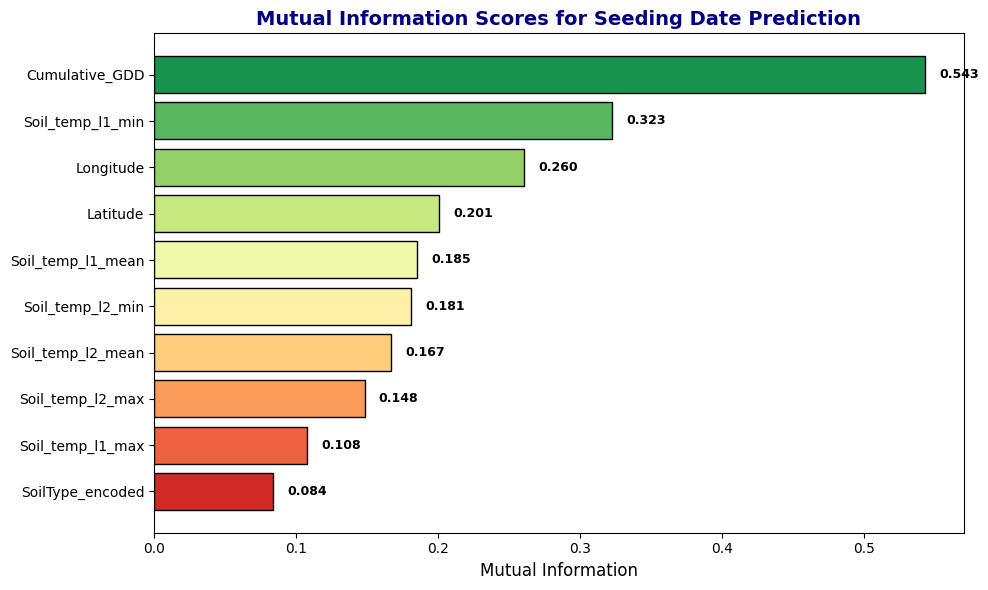


Mutual Information Scores (sorted):
Cumulative_GDD       0.542978
Soil_temp_l1_min     0.322606
Longitude            0.260483
Latitude             0.200791
Soil_temp_l1_mean    0.185389
Soil_temp_l2_min     0.180877
Soil_temp_l2_mean    0.166970
Soil_temp_l2_max     0.148140
Soil_temp_l1_max     0.107649
SoilType_encoded     0.083846


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# Define custom soil type encoding (if not already done)
soil_type_encoding = {
    'Brown': 1,
    'Dark Brown': 2,
    'Moist Dark Brown': 3,
    'Black': 4,
    'Moist Black': 5,
    'Gray': 6,
    'Dark Gray': 7
}

# Apply encoding if not already present
if 'SoilType_encoded' not in df_analysis.columns:
    df_analysis['SoilType_encoded'] = df_analysis['SoilType'].map(soil_type_encoding)

# Columns to drop (non-features)
columns_to_drop = ['Township', 'Year', 'Date', 'SoilType', 'Seeding_DOY']

# Define features (X) and target (y)
X = df_analysis.drop(columns=[col for col in columns_to_drop if col in df_analysis.columns])
y = df_analysis['Seeding_DOY']

# Calculate Mutual Information scores
mi_scores = mutual_info_regression(X, y, random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Reversed colors: Green = higher values, Red = lower values
colors = sns.color_palette('RdYlGn', len(mi_series))
ax.barh(mi_series.index, mi_series.values, color=colors, edgecolor='black')

for j, val in enumerate(mi_series.values):
    ax.text(val + 0.01, j, f'{val:.3f}', va='center', fontsize=9, fontweight='bold')

ax.set_title('Mutual Information Scores for Seeding Date Prediction', 
             fontsize=14, fontweight='bold', color='navy')
ax.set_xlabel('Mutual Information', fontsize=12)

plt.tight_layout()
plt.show()

# Print summary
print("\nMutual Information Scores (sorted):")
print(mi_series.sort_values(ascending=False).to_string())

## ANOVA

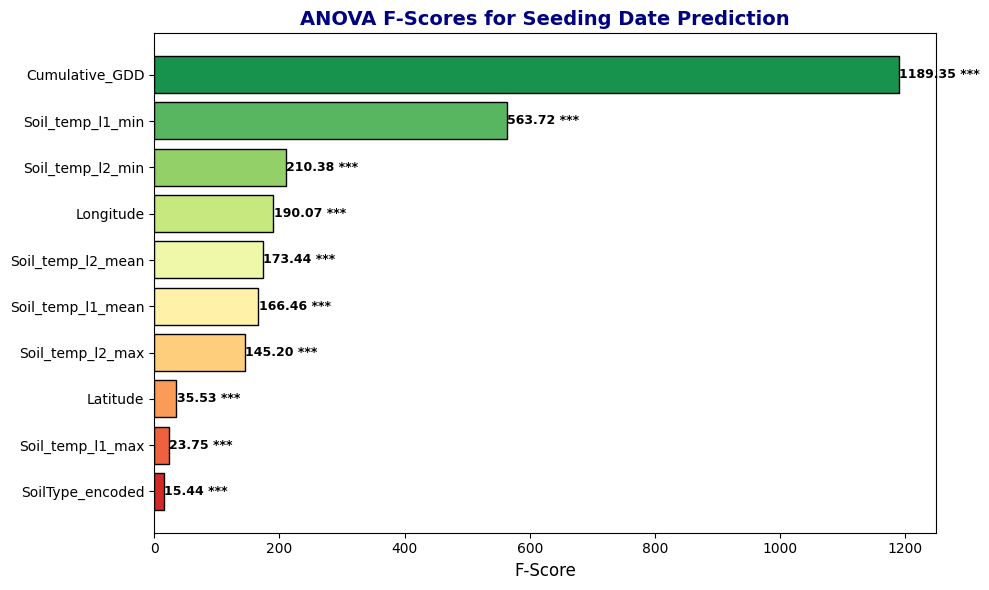


ANOVA F-Scores and P-Values:
--------------------------------------------------
                       F-Score        P-Value
Cumulative_GDD     1189.346079  1.071055e-182
Soil_temp_l1_min    563.715018  8.121876e-103
Soil_temp_l2_min    210.377987   4.113733e-44
Longitude           190.073146   2.646945e-40
Soil_temp_l2_mean   173.442361   3.842535e-37
Soil_temp_l1_mean   166.455962   8.406361e-36
Soil_temp_l2_max    145.197694   1.111432e-31
Latitude             35.525130   3.287747e-09
Soil_temp_l1_max     23.747772   1.242058e-06
SoilType_encoded     15.435132   9.015470e-05

Significance: *** p<0.001, ** p<0.01, * p<0.05


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import f_regression


# Apply encoding if not already present
if 'SoilType_encoded' not in df_analysis.columns:
    df_analysis['SoilType_encoded'] = df_analysis['SoilType'].map(soil_type_encoding)

# Columns to drop (non-features)
columns_to_drop = ['Township', 'Year', 'Date', 'SoilType', 'Seeding_DOY']

# Define features (X) and target (y)
X = df_analysis.drop(columns=[col for col in columns_to_drop if col in df_analysis.columns])
y = df_analysis['Seeding_DOY']

# Calculate ANOVA F-scores
f_scores, p_values = f_regression(X, y)
f_series = pd.Series(f_scores, index=X.columns).sort_values(ascending=True)
p_series = pd.Series(p_values, index=X.columns)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Reversed colors: Green = higher values, Red = lower values
colors = sns.color_palette('RdYlGn', len(f_series))
ax.barh(f_series.index, f_series.values, color=colors, edgecolor='black')

for j, (feat, val) in enumerate(zip(f_series.index, f_series.values)):
    p_val = p_series[feat]
    sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
    ax.text(val + 0.5, j, f'{val:.2f} {sig}', va='center', fontsize=9, fontweight='bold')

ax.set_title('ANOVA F-Scores for Seeding Date Prediction', 
             fontsize=14, fontweight='bold', color='navy')
ax.set_xlabel('F-Score', fontsize=12)

plt.tight_layout()
plt.show()

# Print summary with p-values
print("\nANOVA F-Scores and P-Values:")
print("-" * 50)
summary_df = pd.DataFrame({
    'F-Score': f_series.sort_values(ascending=False),
    'P-Value': p_series[f_series.sort_values(ascending=False).index]
})
print(summary_df.to_string())
print("\nSignificance: *** p<0.001, ** p<0.01, * p<0.05")

# Wrapper Methods

## Forward Selection

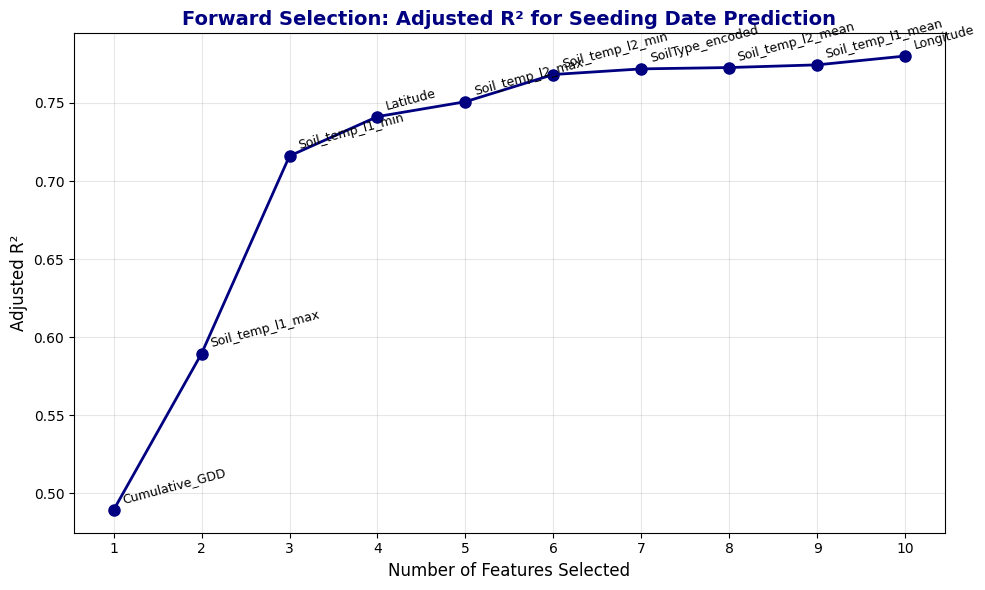


FORWARD SELECTION RESULTS

Best Features (in order of selection):
  1. Cumulative_GDD (Adj R²: 0.4894)
  2. Soil_temp_l1_max (Adj R²: 0.5896)
  3. Soil_temp_l1_min (Adj R²: 0.7161)
  4. Latitude (Adj R²: 0.7413)
  5. Soil_temp_l2_max (Adj R²: 0.7508)
  6. Soil_temp_l2_min (Adj R²: 0.7682)
  7. SoilType_encoded (Adj R²: 0.7718)
  8. Soil_temp_l2_mean (Adj R²: 0.7727)
  9. Soil_temp_l1_mean (Adj R²: 0.7744)
  10. Longitude (Adj R²: 0.7800)

Final Adjusted R²: 0.7800
Total Features Selected: 10


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

def forward_selection(data, response):
    initial_features = data.columns.tolist()
    initial_features.remove(response)
    best_features = []
    best_adj_r2 = -np.inf
    adj_r2_history = []

    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        adj_r2_candidates = pd.Series(index=remaining_features, dtype=float)

        for new_column in remaining_features:
            model = sm.OLS(data[response], add_constant(data[best_features + [new_column]])).fit()
            adj_r2_candidates[new_column] = model.rsquared_adj

        best_feature = adj_r2_candidates.idxmax()
        best_adj_r2_new = adj_r2_candidates.max()

        if best_adj_r2_new > best_adj_r2:
            best_features.append(best_feature)
            adj_r2_history.append(best_adj_r2_new)
            best_adj_r2 = best_adj_r2_new
            initial_features.remove(best_feature)
        else:
            break

    return best_features, adj_r2_history

# Columns to drop (non-features)
columns_to_drop = ['Township', 'Year', 'Date', 'SoilType', 'Seeding_DOY']

# Prepare data
X = df_analysis.drop(columns=[col for col in columns_to_drop if col in df_analysis.columns])
y = df_analysis['Seeding_DOY']

# Handle categorical variables
X_encoded = X.copy()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
if categorical_cols:
    le = LabelEncoder()
    for col in categorical_cols:
        X_encoded[col] = le.fit_transform(X[col].astype(str))

# Create dataframe for forward selection
df_encoded = X_encoded.copy()
df_encoded['Seeding_DOY'] = y.values

# Split data
train_df, test_df = train_test_split(df_encoded, test_size=0.2, random_state=42)

# Perform forward selection
best_features, adj_r2_history = forward_selection(train_df, 'Seeding_DOY')

# Plot Adjusted R² vs Number of Features
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(1, len(adj_r2_history)+1), adj_r2_history, marker='o', linestyle='-', 
        color='navy', linewidth=2, markersize=8)

for i, (feat, r2) in enumerate(zip(best_features, adj_r2_history)):
    ax.annotate(feat, (i+1, r2), textcoords="offset points", xytext=(5, 5), 
                fontsize=9, rotation=15)

ax.set_title('Forward Selection: Adjusted R² for Seeding Date Prediction', 
             fontsize=14, fontweight='bold', color='navy')
ax.set_xlabel('Number of Features Selected', fontsize=12)
ax.set_ylabel('Adjusted R²', fontsize=12)
ax.set_xticks(range(1, len(adj_r2_history)+1))
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*50)
print("FORWARD SELECTION RESULTS")
print("="*50)
print(f"\nBest Features (in order of selection):")
for i, feat in enumerate(best_features, 1):
    print(f"  {i}. {feat} (Adj R²: {adj_r2_history[i-1]:.4f})")

print(f"\nFinal Adjusted R²: {adj_r2_history[-1]:.4f}")
print(f"Total Features Selected: {len(best_features)}")

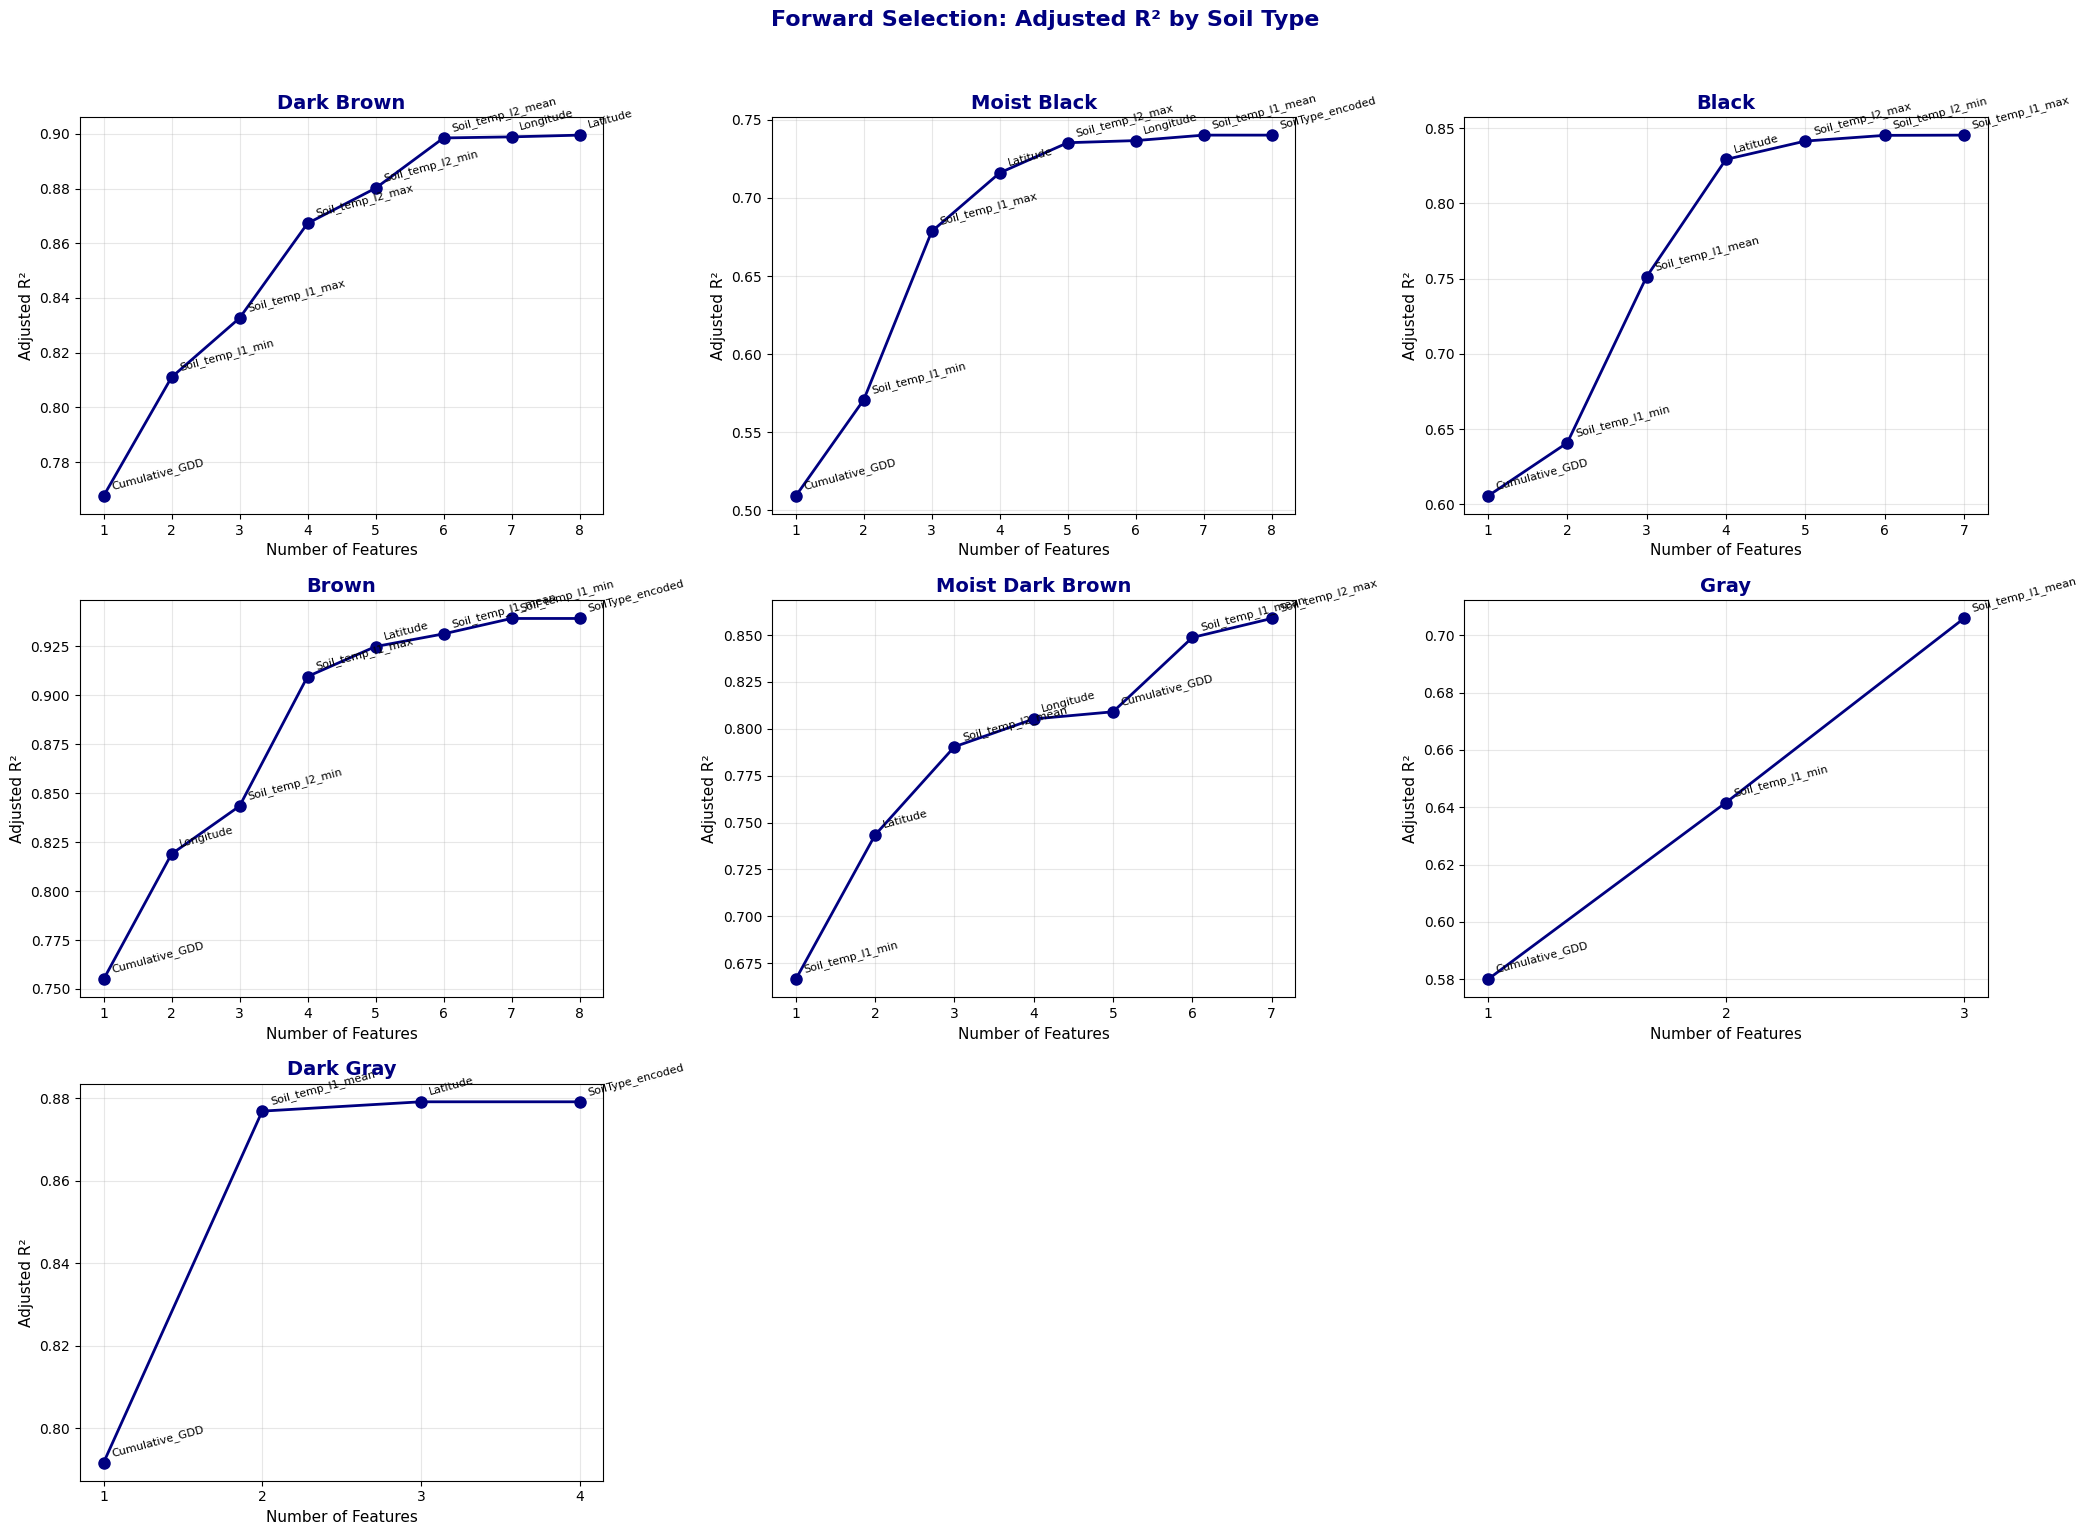

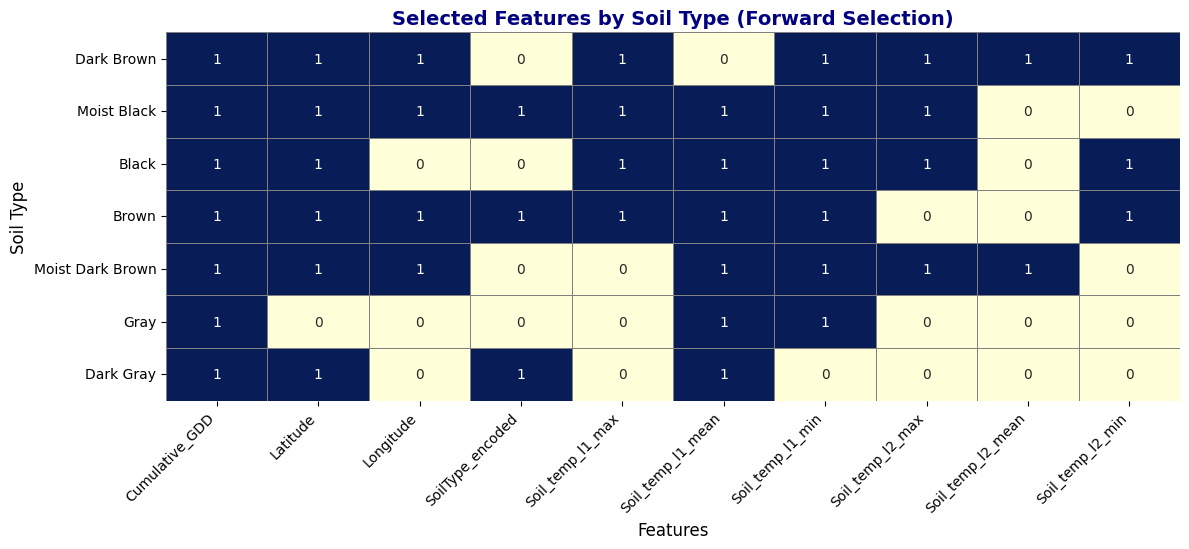


FORWARD SELECTION SUMMARY BY SOIL TYPE

Dark Brown:
  Features selected: 8
  Final Adjusted R²: 0.8995
  Selection order:
    1. Cumulative_GDD (Adj R²: 0.7676)
    2. Soil_temp_l1_min (Adj R²: 0.8110)
    3. Soil_temp_l1_max (Adj R²: 0.8327)
    4. Soil_temp_l2_max (Adj R²: 0.8673)
    5. Soil_temp_l2_min (Adj R²: 0.8801)
    6. Soil_temp_l2_mean (Adj R²: 0.8985)
    7. Longitude (Adj R²: 0.8989)
    8. Latitude (Adj R²: 0.8995)

Moist Black:
  Features selected: 8
  Final Adjusted R²: 0.7403
  Selection order:
    1. Cumulative_GDD (Adj R²: 0.5091)
    2. Soil_temp_l1_min (Adj R²: 0.5708)
    3. Soil_temp_l1_max (Adj R²: 0.6786)
    4. Latitude (Adj R²: 0.7161)
    5. Soil_temp_l2_max (Adj R²: 0.7354)
    6. Longitude (Adj R²: 0.7368)
    7. Soil_temp_l1_mean (Adj R²: 0.7403)
    8. SoilType_encoded (Adj R²: 0.7403)

Black:
  Features selected: 7
  Final Adjusted R²: 0.8454
  Selection order:
    1. Cumulative_GDD (Adj R²: 0.6055)
    2. Soil_temp_l1_min (Adj R²: 0.6409)
    3. Soil

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

def forward_selection(data, response):
    initial_features = data.columns.tolist()
    initial_features.remove(response)
    best_features = []
    best_adj_r2 = -np.inf
    adj_r2_history = []

    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        adj_r2_candidates = pd.Series(index=remaining_features, dtype=float)

        for new_column in remaining_features:
            model = sm.OLS(data[response], add_constant(data[best_features + [new_column]])).fit()
            adj_r2_candidates[new_column] = model.rsquared_adj

        best_feature = adj_r2_candidates.idxmax()
        best_adj_r2_new = adj_r2_candidates.max()

        if best_adj_r2_new > best_adj_r2:
            best_features.append(best_feature)
            adj_r2_history.append(best_adj_r2_new)
            best_adj_r2 = best_adj_r2_new
            initial_features.remove(best_feature)
        else:
            break

    return best_features, adj_r2_history

# Get unique soil types
soil_types = df_analysis['SoilType'].unique().tolist()

# Columns to drop
columns_to_drop = ['Township', 'Year', 'Date', 'SoilType', 'Seeding_DOY']

# Store results
selected_features = {}
adj_r2_plot_data = {}

# Create subplot grid for line plots
n_cols = min(len(soil_types), 3)
n_rows = (len(soil_types) + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(7*n_cols, 5*n_rows))
axes = np.array(axes).flatten() if len(soil_types) > 1 else [axes]

for idx, soil in enumerate(soil_types):
    ax = axes[idx]
    
    # Filter for current soil type
    df_soil = df_analysis[df_analysis['SoilType'] == soil].copy()
    
    if df_soil.empty or len(df_soil) < 10:
        ax.text(0.5, 0.5, f'Insufficient data for {soil}', ha='center', va='center',
                fontsize=12, color='red', transform=ax.transAxes)
        ax.set_title(f'{soil} - Insufficient Data', fontsize=14, fontweight='bold')
        ax.axis('off')
        selected_features[soil] = []
        adj_r2_plot_data[soil] = []
        continue
    
    # Prepare features
    X = df_soil.drop(columns=[col for col in columns_to_drop if col in df_soil.columns])
    y = df_soil['Seeding_DOY']
    
    # Encode categorical variables
    X_encoded = X.copy()
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    if categorical_cols:
        le = LabelEncoder()
        for col in categorical_cols:
            X_encoded[col] = le.fit_transform(X[col].astype(str))
    
    # Create dataframe for forward selection
    df_encoded = X_encoded.copy()
    df_encoded['Seeding_DOY'] = y.values
    
    # Split data
    train_df, test_df = train_test_split(df_encoded, test_size=0.2, random_state=42)
    
    # Perform forward selection
    best_features, adj_r2_history = forward_selection(train_df, 'Seeding_DOY')
    selected_features[soil] = best_features
    adj_r2_plot_data[soil] = adj_r2_history
    
    # Plot
    if len(adj_r2_history) > 0:
        ax.plot(range(1, len(adj_r2_history)+1), adj_r2_history, marker='o', 
                linestyle='-', color='navy', linewidth=2, markersize=8)
        ax.set_xticks(range(1, len(adj_r2_history)+1))
        
        for i, (feat, r2) in enumerate(zip(best_features, adj_r2_history)):
            ax.annotate(feat, (i+1, r2), textcoords="offset points", 
                       xytext=(5, 5), fontsize=8, rotation=15)
    
    ax.set_title(f'{soil}', fontsize=14, fontweight='bold', color='navy')
    ax.set_xlabel('Number of Features', fontsize=11)
    ax.set_ylabel('Adjusted R²', fontsize=11)
    ax.grid(True, alpha=0.3)

# Hide extra subplots
for j in range(len(soil_types), len(axes)):
    axes[j].axis('off')

fig.suptitle('Forward Selection: Adjusted R² by Soil Type', 
             fontsize=16, fontweight='bold', color='navy', y=1.02)
plt.tight_layout()
plt.show()

# ============================================================
# HEATMAP: Selected Features Across Soil Types
# ============================================================

# Gather all unique selected features
all_selected_features = set()
for features in selected_features.values():
    all_selected_features.update(features)

if len(all_selected_features) > 0:
    # Create DataFrame with soil types as rows and features as columns
    feature_list = sorted(all_selected_features)
    heatmap_data = pd.DataFrame(0, index=soil_types, columns=feature_list)

    for soil, features in selected_features.items():
        for feature in features:
            heatmap_data.loc[soil, feature] = 1

    # Plot Heatmap
    plt.figure(figsize=(12, max(4, len(soil_types)*0.8)))
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=False, 
                linewidths=0.5, linecolor='gray')
    plt.title('Selected Features by Soil Type (Forward Selection)', 
              fontsize=14, fontweight='bold', color='navy')
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Soil Type', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# ============================================================
# SUMMARY TABLE
# ============================================================
print("\n" + "="*60)
print("FORWARD SELECTION SUMMARY BY SOIL TYPE")
print("="*60)

for soil in soil_types:
    features = selected_features.get(soil, [])
    r2_values = adj_r2_plot_data.get(soil, [])
    
    print(f"\n{soil}:")
    if len(features) > 0:
        print(f"  Features selected: {len(features)}")
        print(f"  Final Adjusted R²: {r2_values[-1]:.4f}")
        print(f"  Selection order:")
        for i, feat in enumerate(features, 1):
            print(f"    {i}. {feat} (Adj R²: {r2_values[i-1]:.4f})")
    else:
        print("  No features selected or insufficient data")

## Backward Elimination

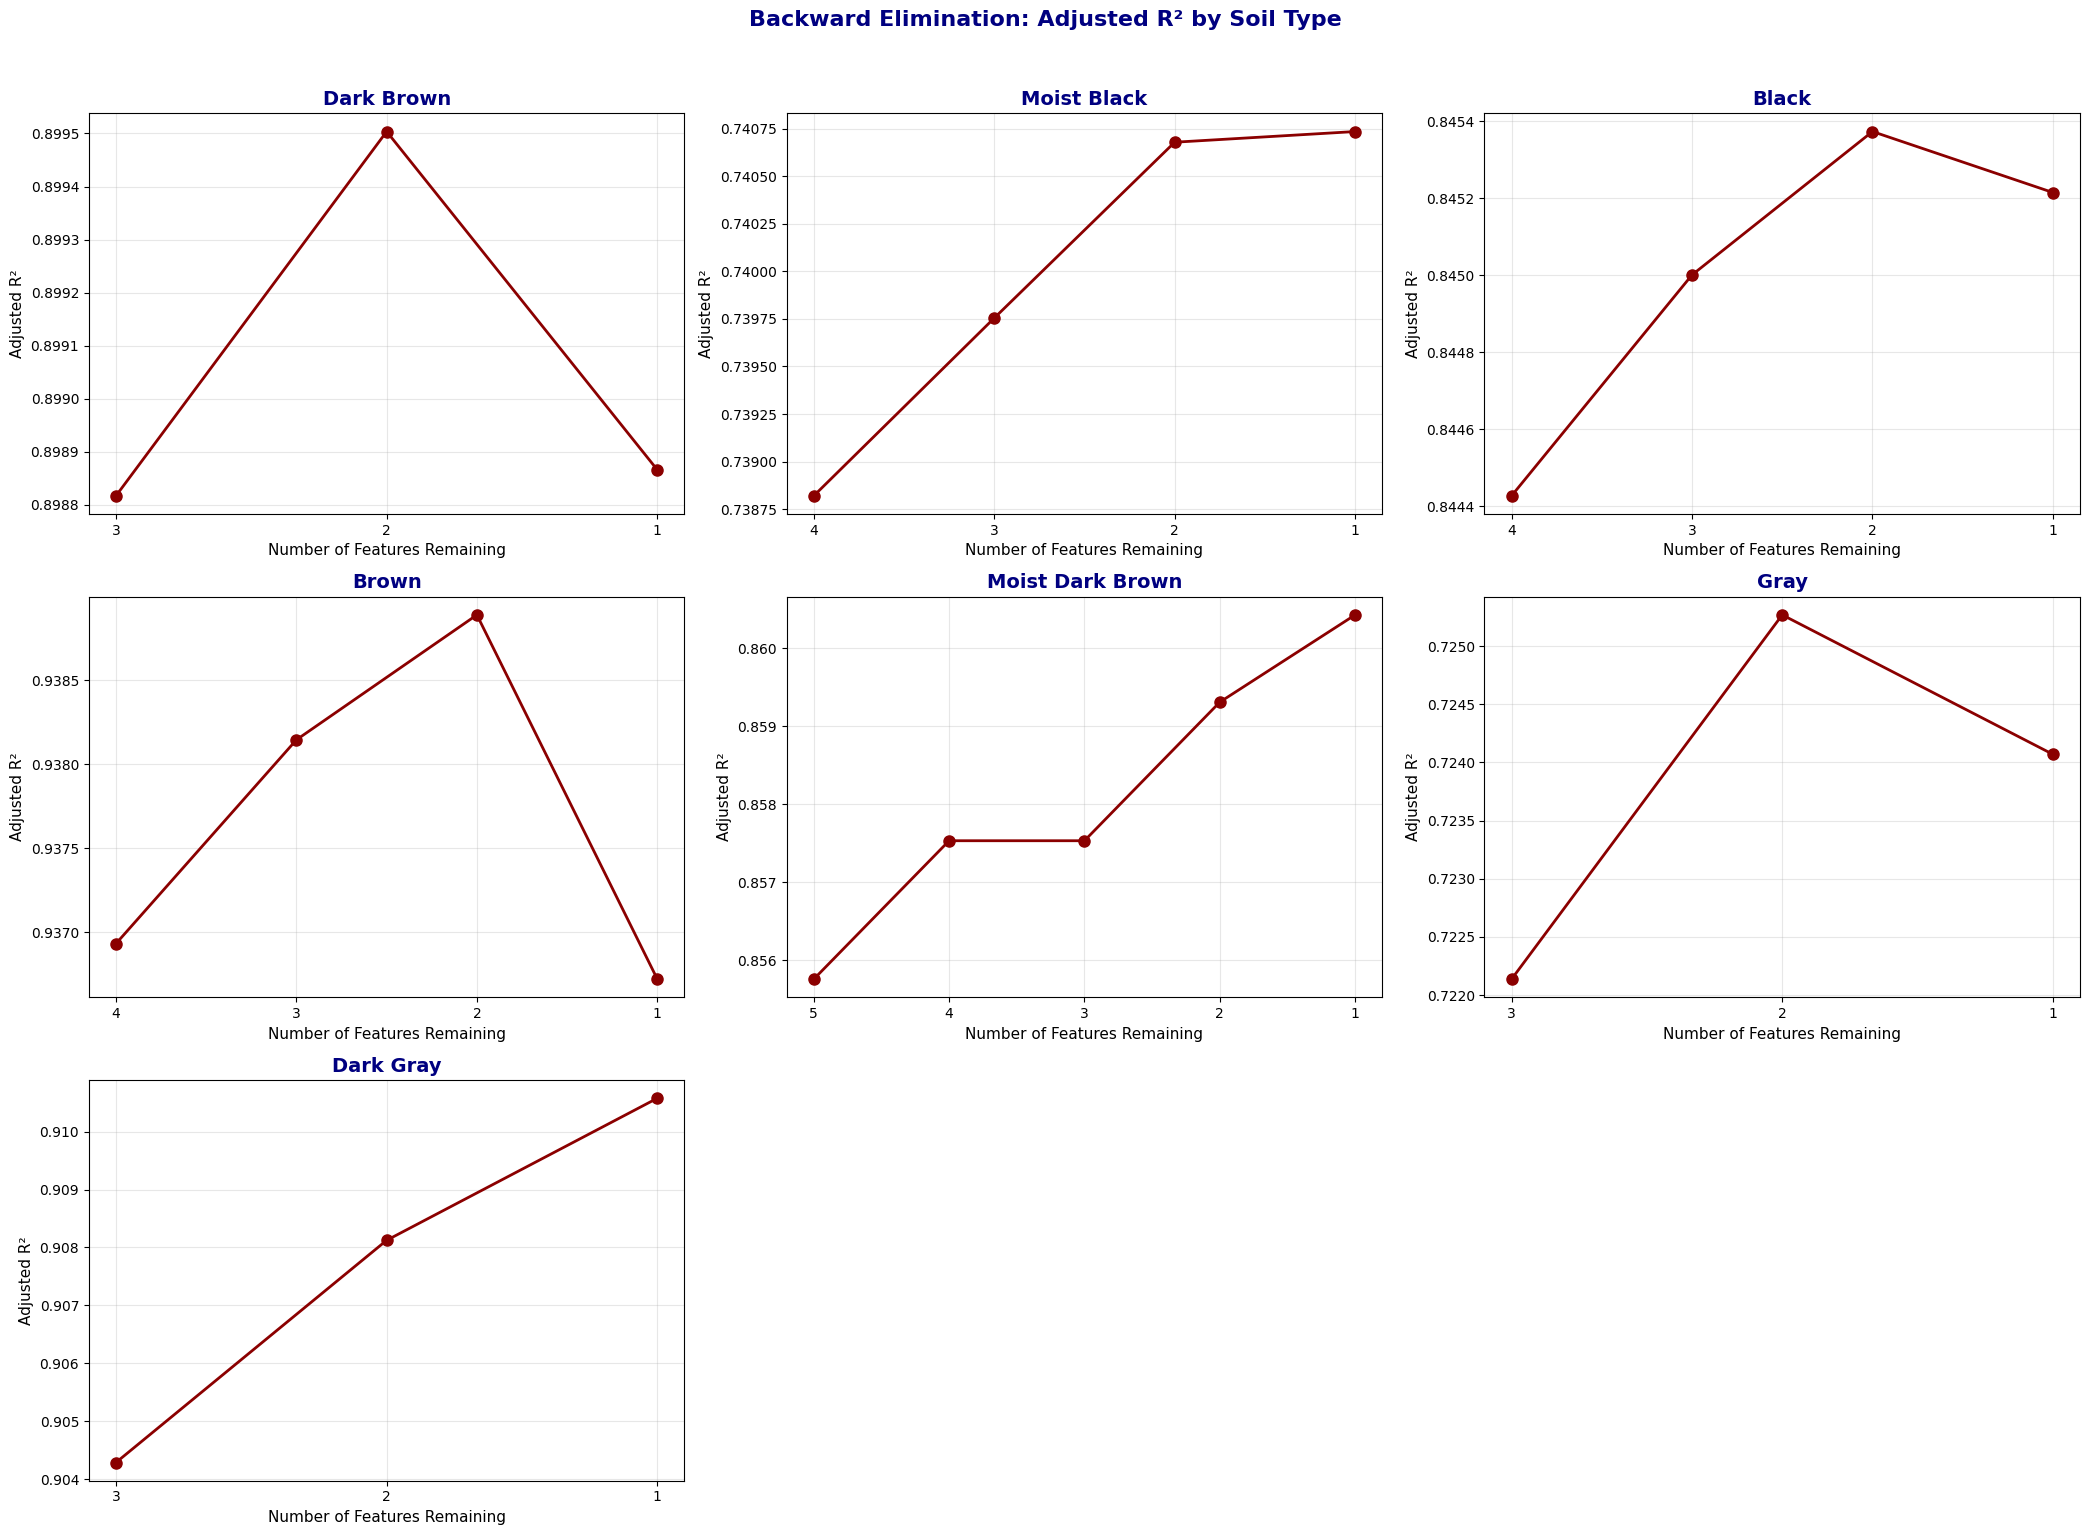

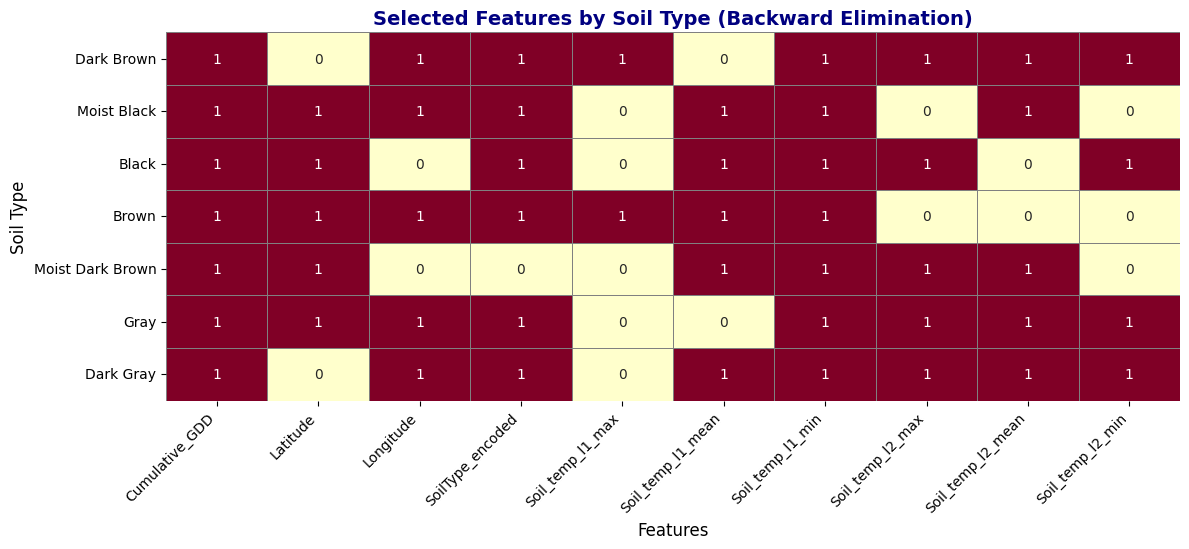


BACKWARD ELIMINATION SUMMARY BY SOIL TYPE

Dark Brown:
  Final features: 8
  Final Adjusted R²: 0.8989
  Selected features: ['Longitude', 'Soil_temp_l1_min', 'Soil_temp_l1_max', 'Soil_temp_l2_min', 'Soil_temp_l2_max', 'Soil_temp_l2_mean', 'Cumulative_GDD', 'SoilType_encoded']
  Removed features (in order):
    - Soil_temp_l1_mean (p-value: 0.8123)
    - Latitude (p-value: 0.1716)

Moist Black:
  Final features: 7
  Final Adjusted R²: 0.7407
  Selected features: ['Longitude', 'Latitude', 'Soil_temp_l1_min', 'Soil_temp_l1_mean', 'Soil_temp_l2_mean', 'Cumulative_GDD', 'SoilType_encoded']
  Removed features (in order):
    - Soil_temp_l1_max (p-value: 0.9273)
    - Soil_temp_l2_max (p-value: 0.9132)
    - Soil_temp_l2_min (p-value: 0.3332)

Black:
  Final features: 7
  Final Adjusted R²: 0.8452
  Selected features: ['Latitude', 'Soil_temp_l1_min', 'Soil_temp_l1_mean', 'Soil_temp_l2_min', 'Soil_temp_l2_max', 'Cumulative_GDD', 'SoilType_encoded']
  Removed features (in order):
    - Soil_te

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

def backward_elimination(data, response, significance_level=0.05):
    features = data.columns.tolist()
    features.remove(response)
    adj_r2_history = []
    removed_features = []
    
    while len(features) > 0:
        X = sm.add_constant(data[features])
        model = sm.OLS(data[response], X).fit()
        p_values = model.pvalues.iloc[1:]  # Exclude intercept
        
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            removed_features.append((excluded_feature, max_p_value))
            features.remove(excluded_feature)
            adj_r2_history.append(model.rsquared_adj)
        else:
            adj_r2_history.append(model.rsquared_adj)
            break
    
    return features, adj_r2_history, removed_features

# Get unique soil types
soil_types = df_analysis['SoilType'].unique().tolist()

# Columns to drop
columns_to_drop = ['Township', 'Year', 'Date', 'SoilType', 'Seeding_DOY']

# Store results
selected_features = {}
adj_r2_plot_data = {}
removed_features_data = {}

# Create subplot grid for line plots
n_cols = min(len(soil_types), 3)
n_rows = (len(soil_types) + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(7*n_cols, 5*n_rows))
axes = np.array(axes).flatten() if len(soil_types) > 1 else [axes]

for idx, soil in enumerate(soil_types):
    ax = axes[idx]
    
    # Filter for current soil type
    df_soil = df_analysis[df_analysis['SoilType'] == soil].copy()
    
    if df_soil.empty or len(df_soil) < 10:
        ax.text(0.5, 0.5, f'Insufficient data for {soil}', ha='center', va='center',
                fontsize=12, color='red', transform=ax.transAxes)
        ax.set_title(f'{soil} - Insufficient Data', fontsize=14, fontweight='bold')
        ax.axis('off')
        selected_features[soil] = []
        adj_r2_plot_data[soil] = []
        removed_features_data[soil] = []
        continue
    
    # Prepare features
    X = df_soil.drop(columns=[col for col in columns_to_drop if col in df_soil.columns])
    y = df_soil['Seeding_DOY']
    
    # Encode categorical variables
    X_encoded = X.copy()
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    if categorical_cols:
        le = LabelEncoder()
        for col in categorical_cols:
            X_encoded[col] = le.fit_transform(X[col].astype(str))
    
    # Create dataframe for backward elimination
    df_encoded = X_encoded.copy()
    df_encoded['Seeding_DOY'] = y.values
    
    # Split data
    train_df, test_df = train_test_split(df_encoded, test_size=0.2, random_state=42)
    
    # Perform backward elimination
    best_features, adj_r2_history, removed = backward_elimination(train_df, 'Seeding_DOY')
    selected_features[soil] = best_features
    adj_r2_plot_data[soil] = adj_r2_history
    removed_features_data[soil] = removed
    
    # Plot
    if len(adj_r2_history) > 0:
        x_vals = range(len(adj_r2_history), 0, -1)  # Decreasing number of features
        ax.plot(x_vals, adj_r2_history, marker='o', linestyle='-', 
                color='darkred', linewidth=2, markersize=8)
        ax.set_xticks(list(x_vals))
        ax.invert_xaxis()  # More features on left, fewer on right
    
    ax.set_title(f'{soil}', fontsize=14, fontweight='bold', color='navy')
    ax.set_xlabel('Number of Features Remaining', fontsize=11)
    ax.set_ylabel('Adjusted R²', fontsize=11)
    ax.grid(True, alpha=0.3)

# Hide extra subplots
for j in range(len(soil_types), len(axes)):
    axes[j].axis('off')

fig.suptitle('Backward Elimination: Adjusted R² by Soil Type', 
             fontsize=16, fontweight='bold', color='navy', y=1.02)
plt.tight_layout()
plt.show()

# ============================================================
# HEATMAP: Selected Features Across Soil Types
# ============================================================

# Gather all unique selected features
all_selected_features = set()
for features in selected_features.values():
    all_selected_features.update(features)

if len(all_selected_features) > 0:
    # Create DataFrame with soil types as rows and features as columns
    feature_list = sorted(all_selected_features)
    heatmap_data = pd.DataFrame(0, index=soil_types, columns=feature_list)

    for soil, features in selected_features.items():
        for feature in features:
            heatmap_data.loc[soil, feature] = 1

    # Plot Heatmap
    plt.figure(figsize=(12, max(4, len(soil_types)*0.8)))
    sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', cbar=False, 
                linewidths=0.5, linecolor='gray')
    plt.title('Selected Features by Soil Type (Backward Elimination)', 
              fontsize=14, fontweight='bold', color='navy')
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Soil Type', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# ============================================================
# SUMMARY TABLE
# ============================================================
print("\n" + "="*60)
print("BACKWARD ELIMINATION SUMMARY BY SOIL TYPE")
print("="*60)

for soil in soil_types:
    features = selected_features.get(soil, [])
    r2_values = adj_r2_plot_data.get(soil, [])
    removed = removed_features_data.get(soil, [])
    
    print(f"\n{soil}:")
    if len(features) > 0:
        print(f"  Final features: {len(features)}")
        print(f"  Final Adjusted R²: {r2_values[-1]:.4f}")
        print(f"  Selected features: {features}")
        if len(removed) > 0:
            print(f"  Removed features (in order):")
            for feat, p_val in removed:
                print(f"    - {feat} (p-value: {p_val:.4f})")
    else:
        print("  No features selected or insufficient data")

## Backward Elimination without grouping to soil types

## Recursive Feature Elimination

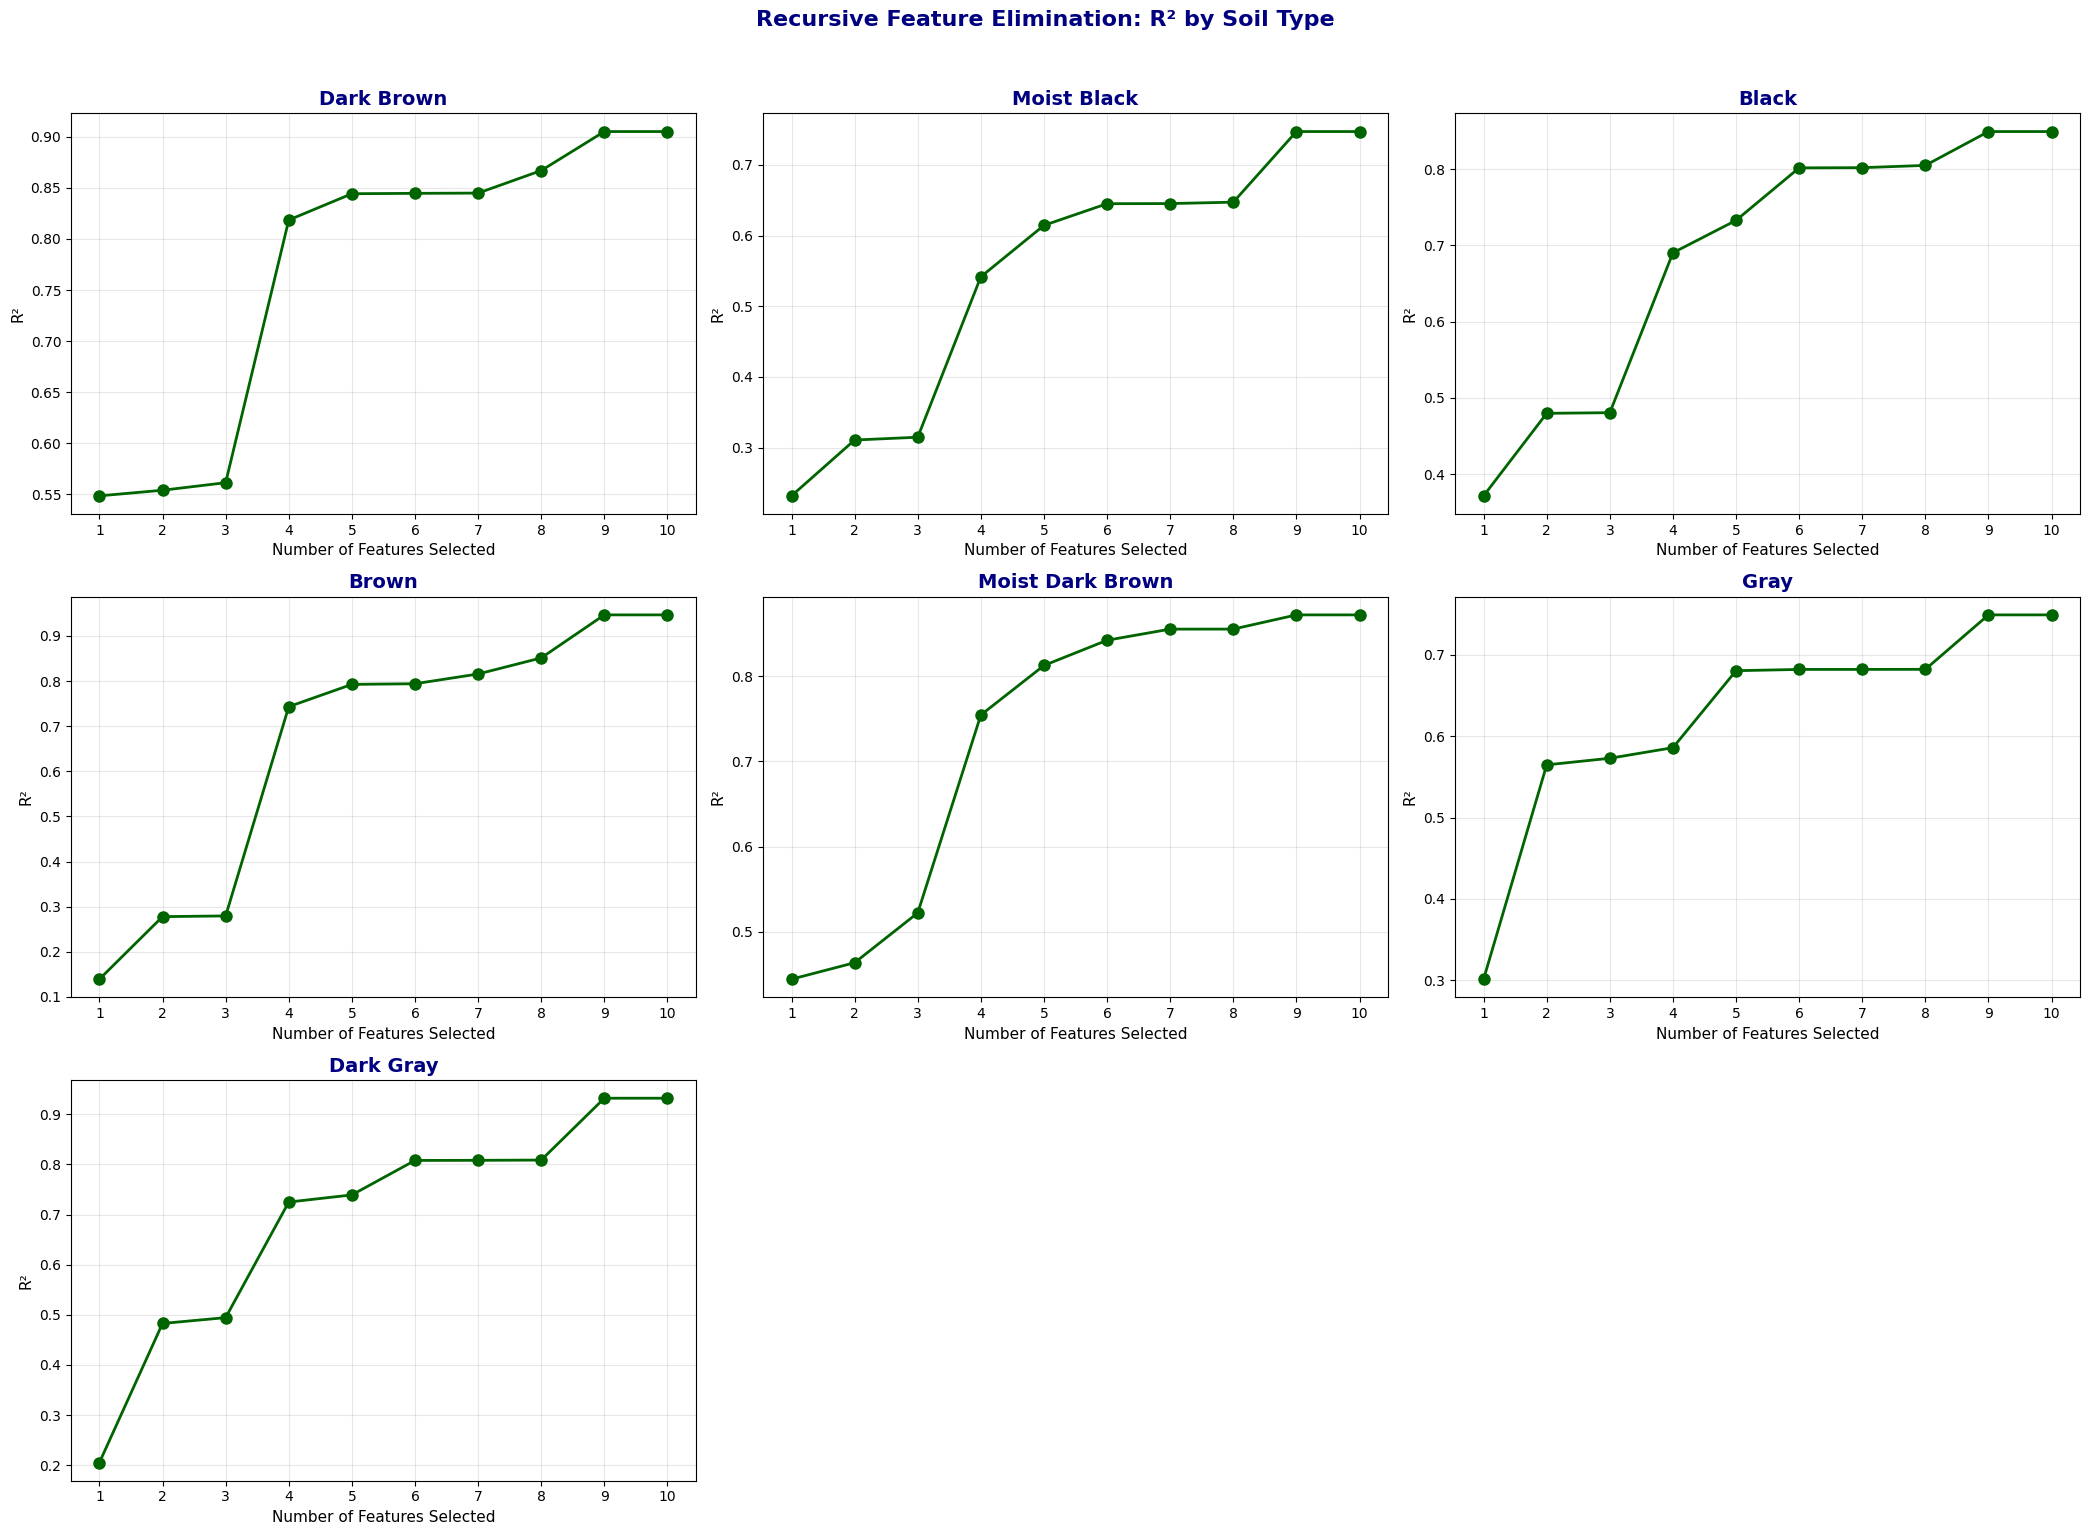

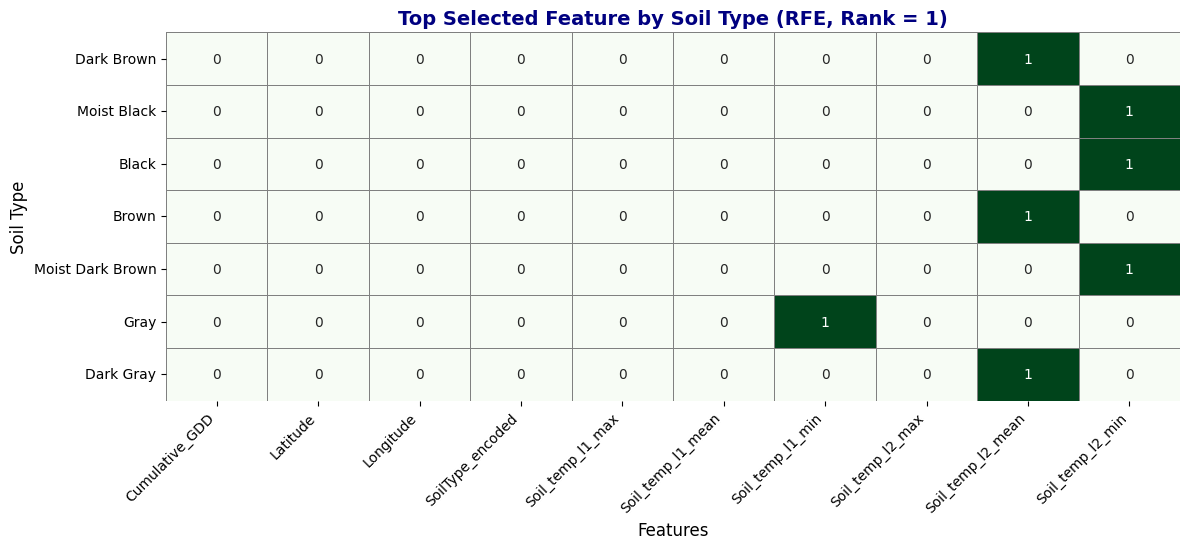

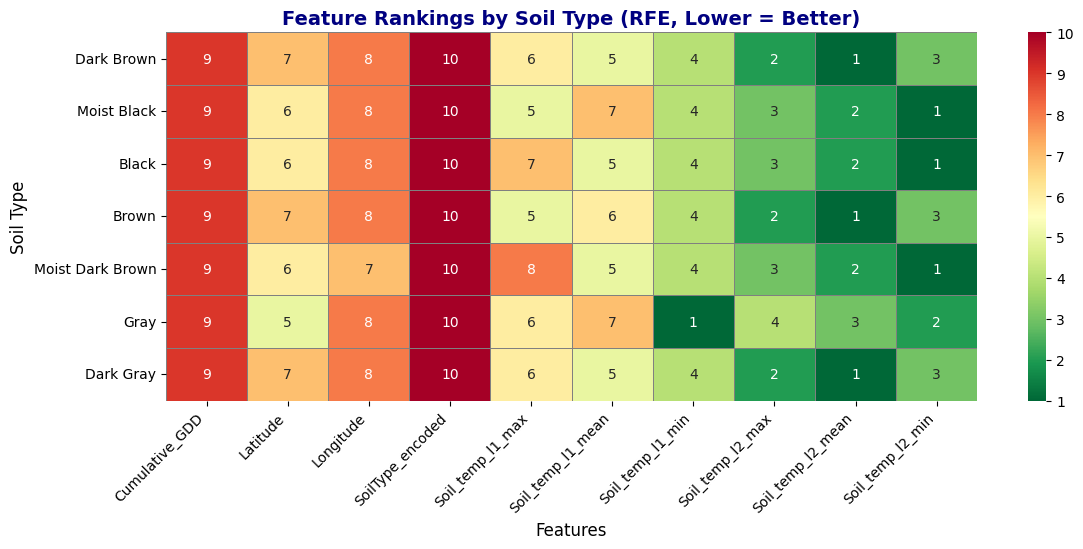


RECURSIVE FEATURE ELIMINATION SUMMARY BY SOIL TYPE

Dark Brown:
  Total features evaluated: 10
  Final R² (all features): 0.9050
  Feature rankings (1 = most important):
    1. Soil_temp_l2_mean
    2. Soil_temp_l2_max
    3. Soil_temp_l2_min
    4. Soil_temp_l1_min
    5. Soil_temp_l1_mean
    6. Soil_temp_l1_max
    7. Latitude
    8. Longitude
    9. Cumulative_GDD
    10. SoilType_encoded

Moist Black:
  Total features evaluated: 10
  Final R² (all features): 0.7471
  Feature rankings (1 = most important):
    1. Soil_temp_l2_min
    2. Soil_temp_l2_mean
    3. Soil_temp_l2_max
    4. Soil_temp_l1_min
    5. Soil_temp_l1_max
    6. Latitude
    7. Soil_temp_l1_mean
    8. Longitude
    9. Cumulative_GDD
    10. SoilType_encoded

Black:
  Total features evaluated: 10
  Final R² (all features): 0.8495
  Feature rankings (1 = most important):
    1. Soil_temp_l2_min
    2. Soil_temp_l2_mean
    3. Soil_temp_l2_max
    4. Soil_temp_l1_min
    5. Soil_temp_l1_mean
    6. Latitude
    7

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

def recursive_feature_elimination(data, response, columns_to_drop):
    X = data.drop(columns=[col for col in columns_to_drop if col in data.columns], errors='ignore')
    y = data[response]

    # Initialize linear regression model
    model = LinearRegression()

    # Perform RFE
    rfe = RFE(model, n_features_to_select=1)
    rfe.fit(X, y)

    # Get the ranking of features
    ranking = pd.Series(rfe.ranking_, index=X.columns)
    
    # Calculate R-squared values during the elimination process
    r_squared_history = []
    for i in range(1, len(X.columns) + 1):
        selected_features = X.columns[ranking <= i]
        model.fit(X[selected_features], y)
        r_squared_history.append(model.score(X[selected_features], y))

    return ranking, r_squared_history

# Get unique soil types
soil_types = df_analysis['SoilType'].unique().tolist()

# Columns to drop
columns_to_drop = ['Township', 'Year', 'Date', 'SoilType', 'Seeding_DOY']

# Store results
selected_features = {}
r_squared_plot_data = {}
feature_rankings = {}

# Create subplot grid for line plots
n_cols = min(len(soil_types), 3)
n_rows = (len(soil_types) + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(7*n_cols, 5*n_rows))
axes = np.array(axes).flatten() if len(soil_types) > 1 else [axes]

for idx, soil in enumerate(soil_types):
    ax = axes[idx]
    
    # Filter for current soil type
    df_soil = df_analysis[df_analysis['SoilType'] == soil].copy()
    
    if df_soil.empty or len(df_soil) < 10:
        ax.text(0.5, 0.5, f'Insufficient data for {soil}', ha='center', va='center',
                fontsize=12, color='red', transform=ax.transAxes)
        ax.set_title(f'{soil} - Insufficient Data', fontsize=14, fontweight='bold')
        ax.axis('off')
        selected_features[soil] = pd.Series(dtype=int)
        r_squared_plot_data[soil] = []
        continue
    
    # Prepare features
    X = df_soil.drop(columns=[col for col in columns_to_drop if col in df_soil.columns])
    y = df_soil['Seeding_DOY']
    
    # Encode categorical variables
    X_encoded = X.copy()
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    if categorical_cols:
        le = LabelEncoder()
        for col in categorical_cols:
            X_encoded[col] = le.fit_transform(X[col].astype(str))
    
    # Create dataframe for RFE
    df_encoded = X_encoded.copy()
    df_encoded['Seeding_DOY'] = y.values
    
    # Split data
    train_df, test_df = train_test_split(df_encoded, test_size=0.2, random_state=42)
    
    # Perform RFE
    ranking, r_squared_history = recursive_feature_elimination(train_df, 'Seeding_DOY', columns_to_drop)
    selected_features[soil] = ranking
    r_squared_plot_data[soil] = r_squared_history
    feature_rankings[soil] = ranking.sort_values()
    
    # Plot
    if len(r_squared_history) > 0:
        x_vals = range(1, len(r_squared_history) + 1)
        ax.plot(x_vals, r_squared_history, marker='o', linestyle='-', 
                color='darkgreen', linewidth=2, markersize=8)
        
        # Set appropriate x-ticks
        if len(r_squared_history) <= 10:
            ax.set_xticks(list(x_vals))
        else:
            ax.set_xticks(list(x_vals)[::2])
    
    ax.set_title(f'{soil}', fontsize=14, fontweight='bold', color='navy')
    ax.set_xlabel('Number of Features Selected', fontsize=11)
    ax.set_ylabel('R²', fontsize=11)
    ax.grid(True, alpha=0.3)

# Hide extra subplots
for j in range(len(soil_types), len(axes)):
    axes[j].axis('off')

fig.suptitle('Recursive Feature Elimination: R² by Soil Type', 
             fontsize=16, fontweight='bold', color='navy', y=1.02)
plt.tight_layout()
plt.show()

# ============================================================
# HEATMAP: Top Selected Features (Rank = 1)
# ============================================================

# Gather all unique features
all_features = set()
for ranking in selected_features.values():
    if len(ranking) > 0:
        all_features.update(ranking.index)

if len(all_features) > 0:
    # Create DataFrame with soil types as rows and features as columns
    feature_list = sorted(all_features)
    heatmap_data = pd.DataFrame(0, index=soil_types, columns=feature_list)

    for soil, ranking in selected_features.items():
        if len(ranking) > 0:
            for feature, rank in ranking.items():
                heatmap_data.loc[soil, feature] = 1 if rank == 1 else 0

    # Plot Heatmap for Top Features (Rank = 1)
    plt.figure(figsize=(12, max(4, len(soil_types)*0.8)))
    sns.heatmap(heatmap_data, annot=True, cmap='Greens', cbar=False, 
                linewidths=0.5, linecolor='gray')
    plt.title('Top Selected Feature by Soil Type (RFE, Rank = 1)', 
              fontsize=14, fontweight='bold', color='navy')
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Soil Type', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# ============================================================
# HEATMAP: Full Feature Rankings
# ============================================================

if len(all_features) > 0:
    # Create DataFrame with actual rankings
    ranking_heatmap = pd.DataFrame(index=soil_types, columns=feature_list)

    for soil, ranking in selected_features.items():
        if len(ranking) > 0:
            for feature in feature_list:
                if feature in ranking.index:
                    ranking_heatmap.loc[soil, feature] = ranking[feature]

    # Plot Heatmap with Rankings
    plt.figure(figsize=(12, max(4, len(soil_types)*0.8)))
    sns.heatmap(ranking_heatmap.astype(float), annot=True, cmap='RdYlGn_r', cbar=True, 
                linewidths=0.5, linecolor='gray', fmt='.0f')
    plt.title('Feature Rankings by Soil Type (RFE, Lower = Better)', 
              fontsize=14, fontweight='bold', color='navy')
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Soil Type', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# ============================================================
# SUMMARY TABLE
# ============================================================
print("\n" + "="*60)
print("RECURSIVE FEATURE ELIMINATION SUMMARY BY SOIL TYPE")
print("="*60)

for soil in soil_types:
    ranking = selected_features.get(soil, pd.Series(dtype=int))
    r2_values = r_squared_plot_data.get(soil, [])
    
    print(f"\n{soil}:")
    if len(ranking) > 0 and len(r2_values) > 0:
        print(f"  Total features evaluated: {len(ranking)}")
        print(f"  Final R² (all features): {r2_values[-1]:.4f}")
        print(f"  Feature rankings (1 = most important):")
        for feat, rank in ranking.sort_values().items():
            print(f"    {int(rank)}. {feat}")
    else:
        print("  No features ranked or insufficient data")

In [19]:
import os
import logging
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# -----------------------------------------------------------
# Configure Directories
# -----------------------------------------------------------
version = "v1"
base_dir = "/Users/dulminiguruge/Documents/GitHub/crop_stages_detection_2026/"  # Update this path

processed_dir = os.path.join(base_dir, "data/processed/")
scalers_dir = os.path.join(processed_dir, "scalers/")
logs_dir = os.path.join(base_dir, "outputs/logs/")

for d in (processed_dir, scalers_dir, logs_dir):
    os.makedirs(d, exist_ok=True)

# -----------------------------------------------------------
# Configure Logging
# -----------------------------------------------------------
logger = logging.getLogger()
logger.setLevel(logging.INFO)
for handler in logger.handlers[:]:
    logger.removeHandler(handler)

log_file_path = os.path.join(logs_dir, f"preprocessing-seeding-{version}.log")
file_handler = logging.FileHandler(log_file_path, mode="w")
file_handler.setFormatter(logging.Formatter("%(asctime)s - %(levelname)s - %(message)s"))
logger.addHandler(file_handler)

logging.info("Logging configured. Log file: %s", log_file_path)

# -----------------------------------------------------------
# Define Per-SoilType Scaling & Splitting Function
# -----------------------------------------------------------
def scale_split_and_pickle(df, features_to_keep, features_to_scale,
                           group_col='SoilType', test_size=0.20, random_state=42):
    logging.info("Starting per-%s MinMax scaling & splitting.", group_col)
    
    # Keep only needed columns
    df = df[features_to_keep].copy()
    train_parts, test_parts = [], []
    
    # For each group, split then fit/transform with its own MinMaxScaler
    for group, subdf in df.groupby(group_col):
        logging.info("%s '%s': total rows=%d", group_col, group, len(subdf))
        
        # Train/test split
        train_df, test_df = train_test_split(
            subdf, test_size=test_size,
            random_state=random_state, shuffle=True
        )
        logging.info(" → train=%d / test=%d", len(train_df), len(test_df))
        
        # Fit scaler on train
        scaler = MinMaxScaler()
        scaler.fit(train_df[features_to_scale])
        logging.info(" → fitted MinMaxScaler for '%s'", group)
        
        # Transform both sets
        train_df.loc[:, features_to_scale] = scaler.transform(train_df[features_to_scale])
        test_df.loc[:, features_to_scale] = scaler.transform(test_df[features_to_scale])
        
        # Collect
        train_parts.append(train_df)
        test_parts.append(test_df)
        
        # Pickle the fitted scaler
        scaler_path = os.path.join(
            scalers_dir,
            f"minmax_scaler_{group.replace(' ', '_')}_{version}.pkl"
        )
        with open(scaler_path, "wb") as f:
            pickle.dump(scaler, f)
        logging.info(" → saved scaler for '%s' to %s", group, scaler_path)
    
    # Concatenate all groups
    train_scaled = pd.concat(train_parts, ignore_index=True)
    test_scaled = pd.concat(test_parts, ignore_index=True)
    logging.info("All groups processed: train shape=%s, test shape=%s",
                 train_scaled.shape, test_scaled.shape)
    
    return train_scaled, test_scaled

# -----------------------------------------------------------
# Features Definition for Seeding Date Detection
# -----------------------------------------------------------
features_to_keep = [
    'Township', 'Year', 'SoilType', 'Seeding_DOY',
    'Soil_temp_l1_min', 'Soil_temp_l1_max', 'Soil_temp_l1_mean',
    'Soil_temp_l2_min', 'Soil_temp_l2_max', 'Soil_temp_l2_mean',
    'Cumulative_GDD', 'Longitude', 'Latitude'
]

features_to_scale = [
    'Soil_temp_l1_min', 'Soil_temp_l1_max', 'Soil_temp_l1_mean',
    'Soil_temp_l2_min', 'Soil_temp_l2_max', 'Soil_temp_l2_mean',
    'Cumulative_GDD', 'Longitude', 'Latitude'
]

# -----------------------------------------------------------
# Run Processing & Save CSVs
# -----------------------------------------------------------
train_scaled, test_scaled = scale_split_and_pickle(
    df_analysis, features_to_keep, features_to_scale, group_col='SoilType'
)

# Save to CSV
train_csv = os.path.join(processed_dir, f"train_scaled_seeding_{version}.csv")
test_csv = os.path.join(processed_dir, f"test_scaled_seeding_{version}.csv")

train_scaled.to_csv(train_csv, index=False)
logging.info("Saved scaled training data to %s", train_csv)

test_scaled.to_csv(test_csv, index=False)
logging.info("Saved scaled test data to %s", test_csv)

# Print summary
print(f"\nPreprocessing Complete!")
print(f"Train shape: {train_scaled.shape}")
print(f"Test shape: {test_scaled.shape}")
print(f"Files saved to: {processed_dir}")


Preprocessing Complete!
Train shape: (979, 13)
Test shape: (248, 13)
Files saved to: /Users/dulminiguruge/Documents/GitHub/crop_stages_detection_2026/data/processed/
